In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\nadanee\Desktop\MY CASE STUDES\california_housing.csv'
df = pd.read_csv(path)

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
train_data =x_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11175,-117.97,33.82,26.0,4013.0,985.0,2442.0,922.0,3.7655,<1H OCEAN,197700.0
6901,-118.15,34.04,33.0,818.0,195.0,664.0,198.0,2.1944,<1H OCEAN,203300.0
20276,-119.21,34.19,15.0,5614.0,989.0,2754.0,994.0,5.0350,NEAR OCEAN,242900.0
16202,-121.28,37.94,44.0,1406.0,357.0,1489.0,386.0,1.4688,INLAND,56800.0
18964,-122.03,38.27,24.0,3580.0,735.0,1959.0,731.0,2.7284,INLAND,118500.0
...,...,...,...,...,...,...,...,...,...,...
6093,-117.87,34.12,33.0,2059.0,361.0,1073.0,339.0,4.2454,<1H OCEAN,183800.0
18087,-122.06,37.30,11.0,5488.0,706.0,1947.0,641.0,10.7326,<1H OCEAN,500001.0
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,<1H OCEAN,196100.0
18868,-122.22,38.10,44.0,2256.0,451.0,1057.0,426.0,3.1204,NEAR BAY,110800.0


In [10]:
# Preprocessing

In [11]:
# we add 1 to each to avoid returning a 0

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1) 

In [12]:
# Generate one-hot encoding for ocean_proximity
dummies = pd.get_dummies(train_data['ocean_proximity'])

# Drop the original categorical column
train_data = train_data.drop('ocean_proximity', axis=1)

# Add the dummy columns to the dataset
train_data = train_data.join(dummies)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11175,-117.97,33.82,26.0,8.297544,6.893656,7.800982,6.827629,3.7655,197700.0,True,False,False,False,False
6901,-118.15,34.04,33.0,6.708084,5.278115,6.499787,5.293305,2.1944,203300.0,True,False,False,False,False
20276,-119.21,34.19,15.0,8.633197,6.897705,7.921173,6.902743,5.0350,242900.0,False,False,False,False,True
16202,-121.28,37.94,44.0,7.249215,5.880533,7.306531,5.958425,1.4688,56800.0,False,True,False,False,False
18964,-122.03,38.27,24.0,8.183397,6.601230,7.580700,6.595781,2.7284,118500.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,-117.87,34.12,33.0,7.630461,5.891644,6.979145,5.828946,4.2454,183800.0,True,False,False,False,False
18087,-122.06,37.30,11.0,8.610501,6.561031,7.574558,6.464588,10.7326,500001.0,True,False,False,False,False
11162,-118.00,33.83,26.0,7.449498,5.955837,6.930495,5.910797,3.9333,196100.0,True,False,False,False,False
18868,-122.22,38.10,44.0,7.721792,6.113682,6.964136,6.056784,3.1204,110800.0,False,False,False,True,False


In [14]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households'] = train_data['total_rooms'] / train_data['households']

<Axes: >

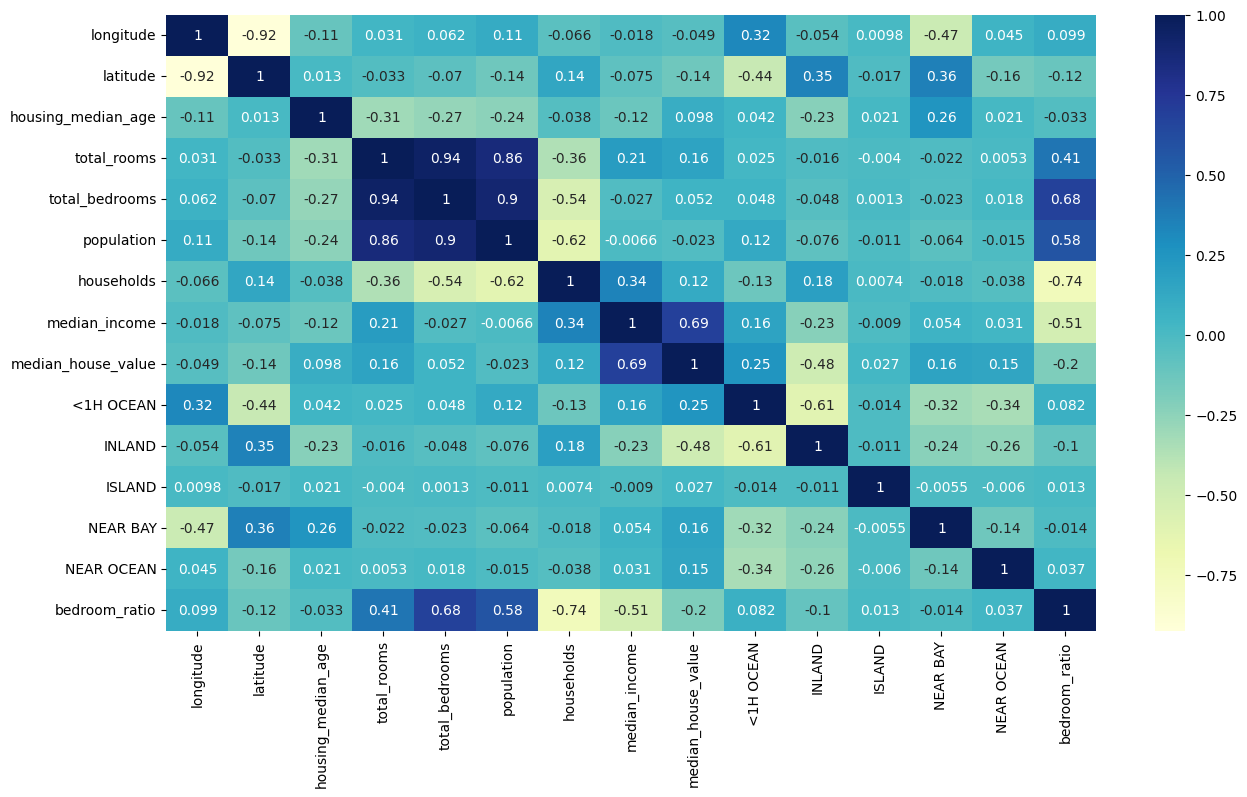

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [16]:
from sklearn.linear_model import LinearRegression

# Define features and target
x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

# Build and fit the model
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [17]:
test_data = x_test.join(y_test)

In [18]:
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# Generate one-hot encoding for ocean_proximity
dummies = pd.get_dummies(test_data['ocean_proximity'])

# Drop the original categorical column
test_data = test_data.drop('ocean_proximity', axis=1)

# Add the dummy columns to the dataset
test_data = test_data.join(dummies)

In [19]:
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households'] = test_data['total_rooms'] / test_data['households']
x_test, y_test = train_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [20]:
from sklearn.model_selection import train_test_split

# Features and target
X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']

# Split both at once!
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
reg = LinearRegression()
reg.fit(x_train, y_train)

score = reg.score(x_test, y_test)
print(f"R² Score: {score:.4f}")

R² Score: 0.6825


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define features and target
x_train_s = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

# Initialize and apply the scaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train_s)

# Build and fit the model
reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [23]:
x_test_s = scaler.transform(x_test)
reg.score(x_test_s, y_test)

0.6848113306436958

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define full X and y first
X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']

# Split them together
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the model
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
y_pred = forest.predict(x_test)
score = forest.score(x_test, y_test)
print(f"R² Score: {score:.4f}")

R² Score: 0.8266


In [26]:
# We would use GridSearchCv with Cross-validation to improve the model performance,
# by providing parameter grid and trying different options.
# Cross-validation is splitting the data into n_folds and using a certain number of folds for training,
# and the other folds for testing. 
# For instance, splitting the data into 10 folds 9 folds for training and 1 fold for testing.


from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [5, 25, 50],
    "max_features":[10, 20, 30, 40],
    "min_samples_split":[None, 2, 4, 6]
}
gridsearch = GridSearchCV(forest, param_grid, cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing     import StandardScaler
from sklearn.ensemble          import RandomForestRegressor

# 1. Define full features and target
X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']

# 2. Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Scale the features
scaler     = StandardScaler()
x_train_s  = scaler.fit_transform(x_train)
x_test_s   = scaler.transform(x_test)

# 4. Set up your grid search
forest     = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators':     [5, 25, 50],
    'max_features':     [10, 20, 30, 40],
    'min_samples_split':[2, 4, 6]
}

gridsearch = GridSearchCV(
    forest,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

# 5. Fit on the correctly sized (x_train_s, y_train)
gridsearch.fit(x_train_s, y_train)

# 6. Extract and evaluate the best model
best_forest = gridsearch.best_estimator_
test_score  = best_forest.score(x_test_s, y_test)

print("Best hyperparameters:", gridsearch.best_params_)
print(f"Test R² score: {test_score:.4f}")